# [2주차 과제(9.10 업로드)](!https://cyber.gachon.ac.kr/mod/ubboard/article.php?id=859585&page=3&bwid=784917)

- Abalone 데이터로 ML : classification, regression 수행. label = ring
- Abalone 데이터로 CNN : classification, regression 수행. label = ring

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy import stats
from sklearn.model_selection import train_test_split

file_path = './abalone.csv'

In [2]:
df = pd.read_csv(file_path, header = 0) # header가 존재하기에, 0번째 행을 header로 지정
df = df.drop("id", axis = 1) # id 열을 지울거니까 axis를 1로 지정 (*행을 지우려면 axis = 1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df['Sex'] = label.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


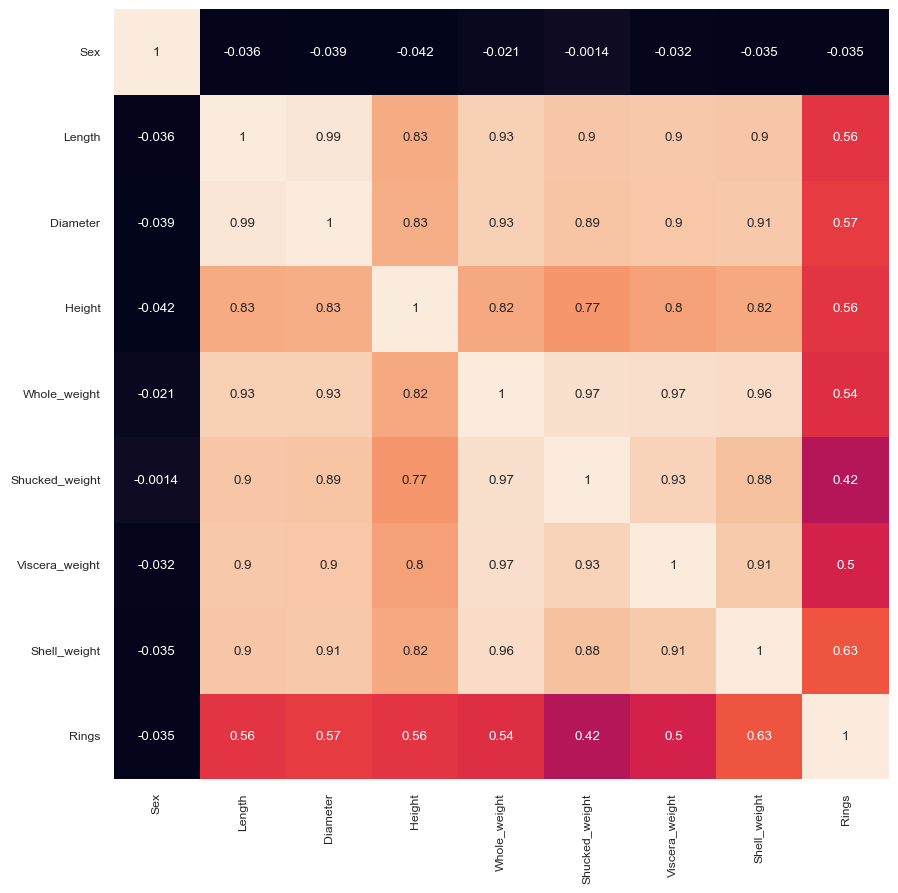

In [5]:
from pandas.plotting import scatter_matrix

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

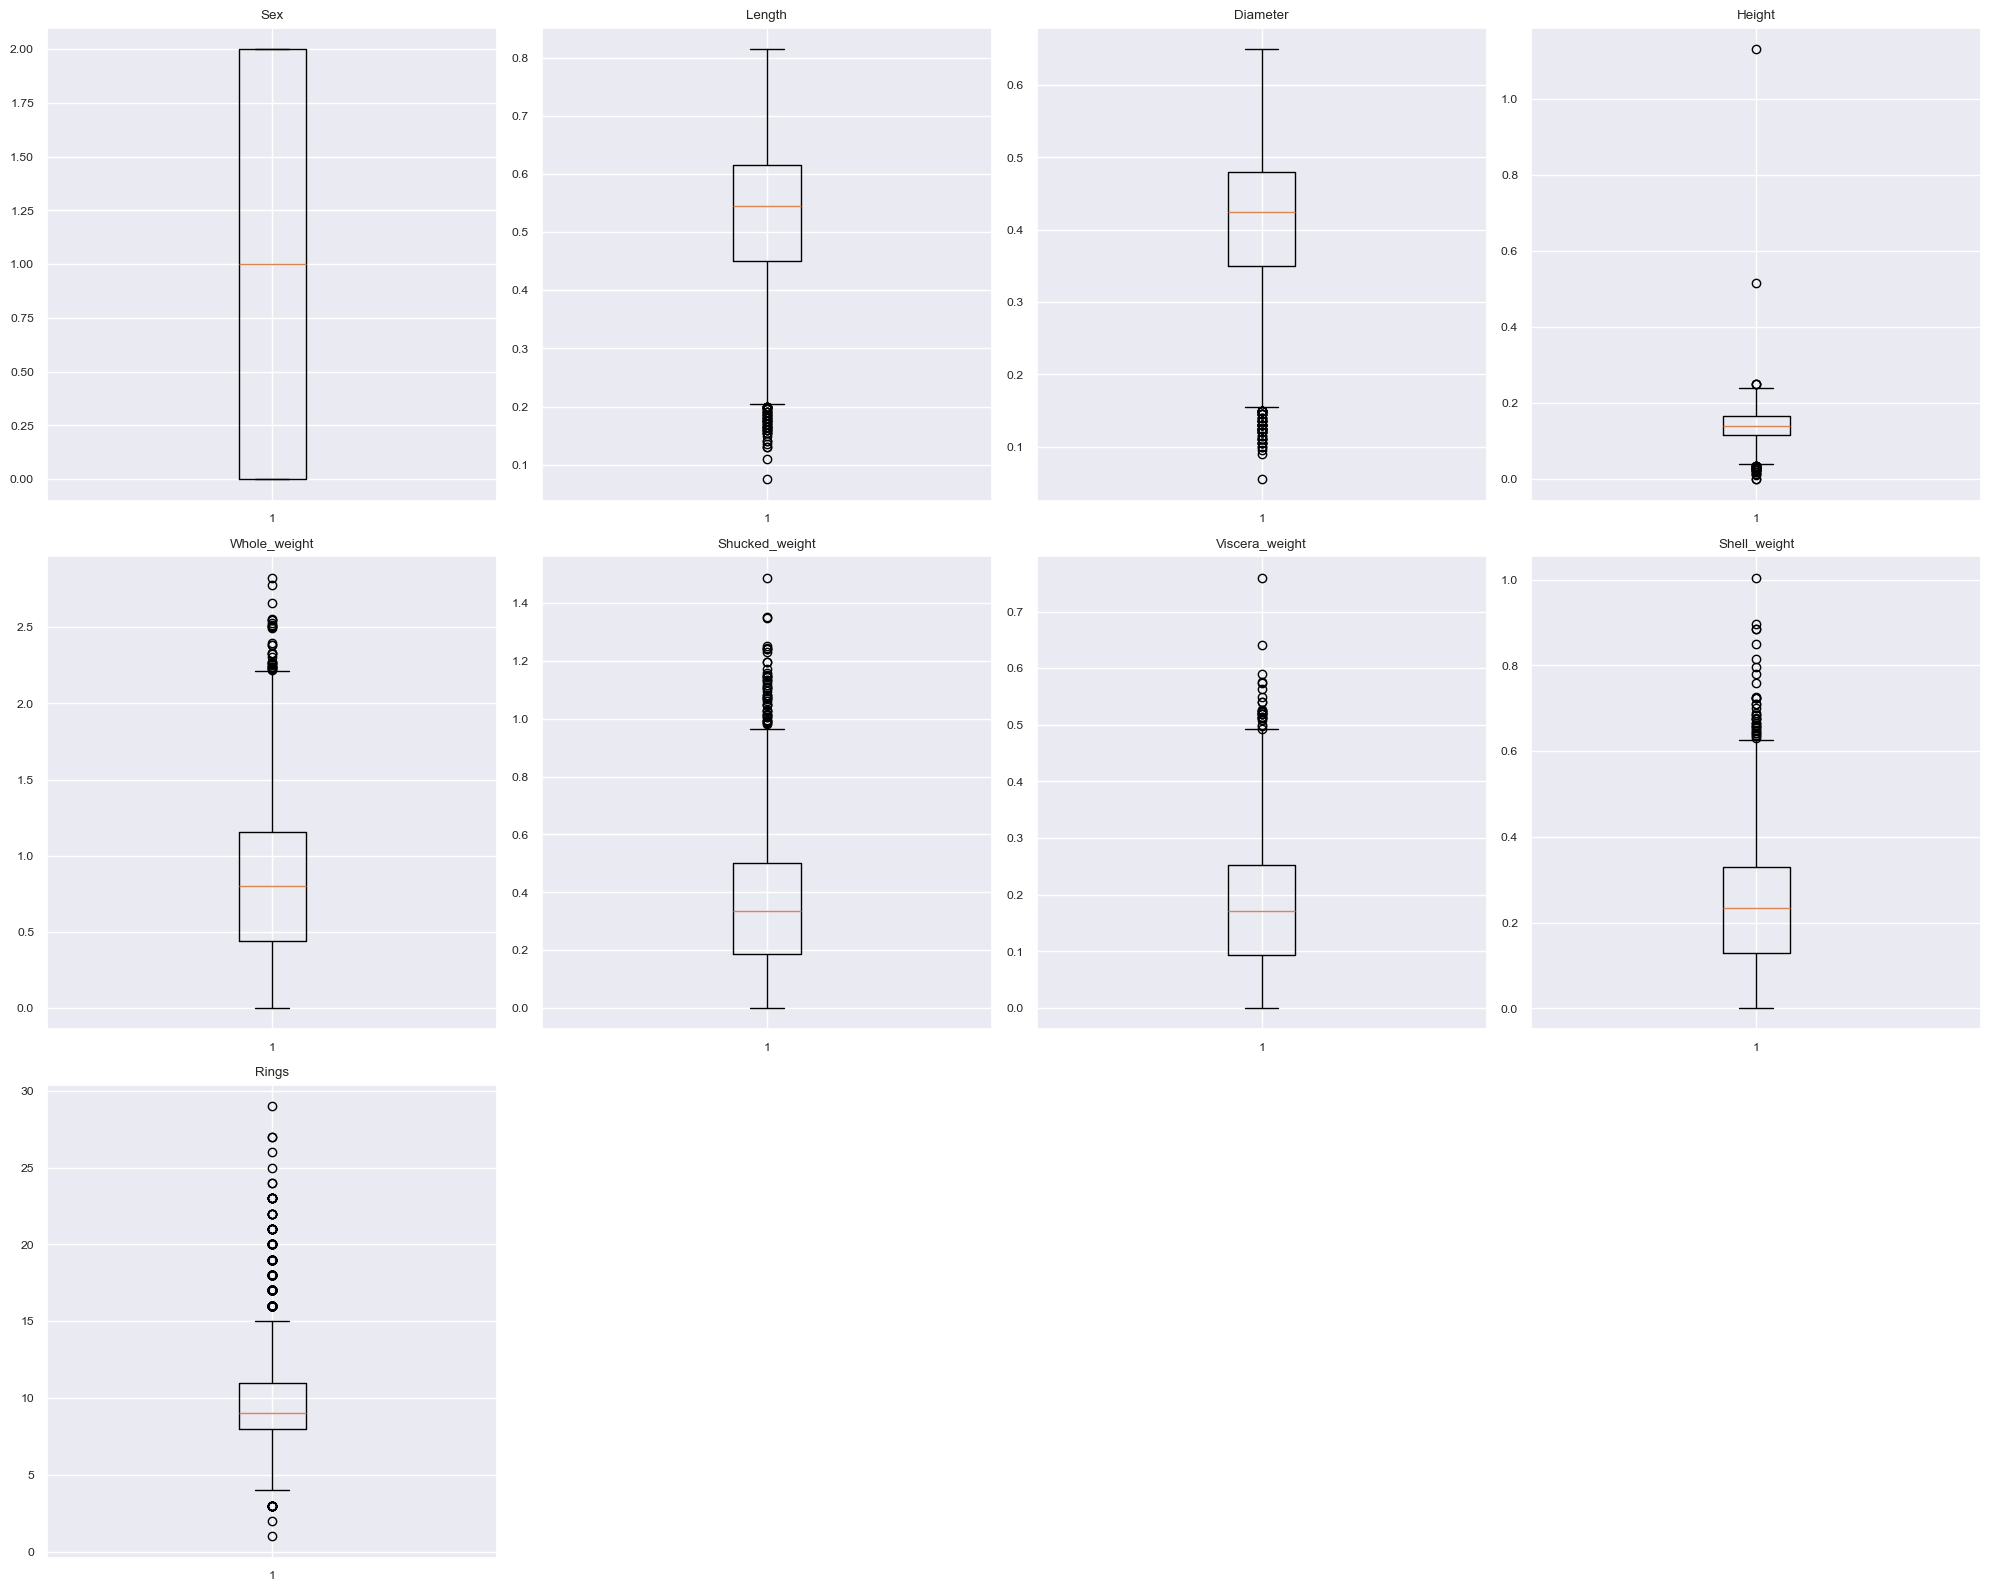

In [6]:
# 박스 플롯 그리기
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Label')

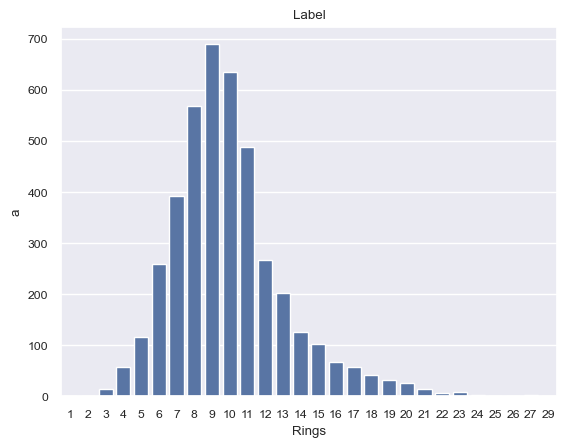

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.ylabel("a")
plt.title("Label")

In [8]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('Rings', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,1.151980,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,-1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [10]:
X=scaled_df_standard
X.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757


In [11]:
y=df['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3132, 8) (1045, 8) (3132,) (1045,)


## Abalone 데이터로 ML : classification, regression 수행.

### REGRESSION

In [19]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print("\n--- Abalone Regression ---")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


--- Abalone Regression ---
Mean Squared Error: 5.062537954095225
R^2 Score: 0.5323381317508216


### CLASSIFICATION

In [15]:
df['AgeGroup'] = pd.cut(df['Rings'], bins=[0, 10, 20, float('inf')], labels=['Young', 'Middle-aged', 'Old'])
X = df.drop(['Rings', 'AgeGroup'], axis=1)
y = df['AgeGroup']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n--- Abalone Classification ---")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


--- Abalone Classification ---
Accuracy: 0.7667464114832536
Confusion Matrix:
 [[175   0  91]
 [  9   0   1]
 [ 94   0 466]]


## Abalone 데이터로 CNN : classification, regression 수행.

### CNN CLASSIFICATION

In [33]:
df['AgeGroup'] = pd.cut(df['Rings'], bins=[0, 10, 20, float('inf')], labels=[0, 1, 2])  # Young, Middle-aged, Old
X = df.drop(['Rings', 'AgeGroup'], axis=1)
y = df['AgeGroup']

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
from tensorflow.keras.utils import to_categorical
X = X.reshape(X.shape[0], X.shape[1], 1, 1)

y = to_categorical(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

model = Sequential([
    Conv2D(8, (1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    MaxPooling2D((1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Young, Middle-aged, Old
])


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
334/334 [==============================] - 80s 238ms/step - loss: 0.4756 - accuracy: 0.7732 - val_loss: 0.4870 - val_accuracy: 0.7848
Epoch 2/10
334/334 [==============================] - 78s 233ms/step - loss: 0.4676 - accuracy: 0.7807 - val_loss: 0.4854 - val_accuracy: 0.7982
Epoch 3/10
334/334 [==============================] - 70s 209ms/step - loss: 0.4654 - accuracy: 0.7773 - val_loss: 0.4704 - val_accuracy: 0.7907
Epoch 4/10
334/334 [==============================] - 82s 246ms/step - loss: 0.4571 - accuracy: 0.7807 - val_loss: 0.4737 - val_accuracy: 0.7758
Epoch 5/10
334/334 [==============================] - 63s 189ms/step - loss: 0.4576 - accuracy: 0.7829 - val_loss: 0.4754 - val_accuracy: 0.7683
Epoch 6/10
334/334 [==============================] - 50s 151ms/step - loss: 0.4557 - accuracy: 0.7829 - val_loss: 0.4781 - val_accuracy: 0.7833
Epoch 7/10
334/334 [==============================] - 64s 192ms/step - loss: 0.4517 - accuracy: 0.7833 - val_loss: 0.4757 - val_ac

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\n--- CNN Classification on Abalone ---")
print("Test Accuracy:", test_accuracy)

27/27 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7476

--- CNN Classification on Abalone ---
Test Accuracy: 0.7476076483726501


In [48]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

Epoch 1/10
184/334 [===============>..............] - ETA: 44s - loss: 0.4487 - accuracy: 0.7948

KeyboardInterrupt: 

### CNN REGRESSION

In [19]:
X = df.drop(['Rings', 'AgeGroup'], axis=1)
y = df['Rings']

In [20]:
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], X.shape[1], 1, 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

model = Sequential([
    Conv2D(8, (1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    MaxPooling2D((1, 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Single output for regression
])

In [25]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [26]:
model.fit(X_train, y_train, epochs=10, batch_size=3, validation_split=0.2)

Epoch 1/10
891/891 [==============================] - 19s 21ms/step - loss: 12.7487 - mae: 2.4378 - val_loss: 4.6372 - val_mae: 1.5004
Epoch 2/10
891/891 [==============================] - 23s 26ms/step - loss: 5.3973 - mae: 1.6703 - val_loss: 4.7123 - val_mae: 1.4703
Epoch 3/10
891/891 [==============================] - 18s 20ms/step - loss: 5.1191 - mae: 1.6405 - val_loss: 4.2060 - val_mae: 1.4536
Epoch 4/10
891/891 [==============================] - 20s 22ms/step - loss: 5.0148 - mae: 1.6104 - val_loss: 4.2558 - val_mae: 1.4236
Epoch 5/10
891/891 [==============================] - 22s 25ms/step - loss: 4.9653 - mae: 1.6014 - val_loss: 5.4395 - val_mae: 1.7903
Epoch 6/10
891/891 [==============================] - 18s 21ms/step - loss: 4.9877 - mae: 1.6135 - val_loss: 4.1978 - val_mae: 1.4122
Epoch 7/10
891/891 [==============================] - 24s 26ms/step - loss: 4.8728 - mae: 1.5879 - val_loss: 4.0972 - val_mae: 1.4308
Epoch 8/10
891/891 [==============================] - 22s 24m

In [27]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("\n--- CNN Regression on Abalone ---")
print("Mean Absolute Error on Test Set:", test_mae)

27/27 [==============================] - 0s 966us/step - loss: 4.6849 - mae: 1.5646

--- CNN Regression on Abalone ---
Mean Absolute Error on Test Set: 1.5646432638168335
